In [3]:
from utils.db.get_data_db import get_data_json, get_t_options

import numpy as np
import seaborn as sns
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

db_file_path = 'data/study_02.db'
data = get_data_json(db_file_path)

t_ids = {}
t_ids['T1'] = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']
t_ids['T2'] = ['t11','t12','t13','t14','t15','t16']

def _opts_per_task(t_options, t_ids):
    """
        t_options: task options as retrieved by database (List of tuples)
    """
    opts_per_task={}
    corr_per_task = {}
    for row in t_options:
        if row[0] in t_ids:
            if row[0] not in opts_per_task:
                opts_per_task[row[0]] = []
            if row[0] not in corr_per_task:
                corr_per_task[row[0]] = []   
            opts_per_task[row[0]].append(row[1])
            if row[2]:
                corr_per_task[row[0]].append(row[1])
    return opts_per_task, corr_per_task

# T1
## Answers to Question
### First Agent

In [4]:
t_options = get_t_options(db_file_path)
opts_per_task, corr_per_task = _opts_per_task(t_options, t_ids['T1'])
##
T1_answ_options_count_per_task = {}
T1_answ_options_count_per_task["tasks"] = []
T1_answ_options_count_per_task["response"] = []
T1_answ_options_count_per_task["correct_answ"] = []
for p_id in data:
    for t_id in data[p_id]["t_answers"]:
        if t_id in t_ids['T1']:
            for rep in data[p_id]["t_answers"][t_id]["options"]:
                T1_answ_options_count_per_task["tasks"].append(t_id)
                if rep == corr_per_task[t_id][0]:
                    T1_answ_options_count_per_task["correct_answ"].append(1)
                else:
                    T1_answ_options_count_per_task["correct_answ"].append(0)
                if 'Both' in rep:
                    T1_answ_options_count_per_task["response"].append('Both')
                elif rep == 'Causal Model 1':
                    T1_answ_options_count_per_task["response"].append('CM1')
                elif rep == 'Causal Model 2':
                    T1_answ_options_count_per_task["response"].append('CM2')
T1_answ_options_count_per_task

df = pd.DataFrame.from_dict(T1_answ_options_count_per_task)
# df = df.sort_values(by=['tasks'])

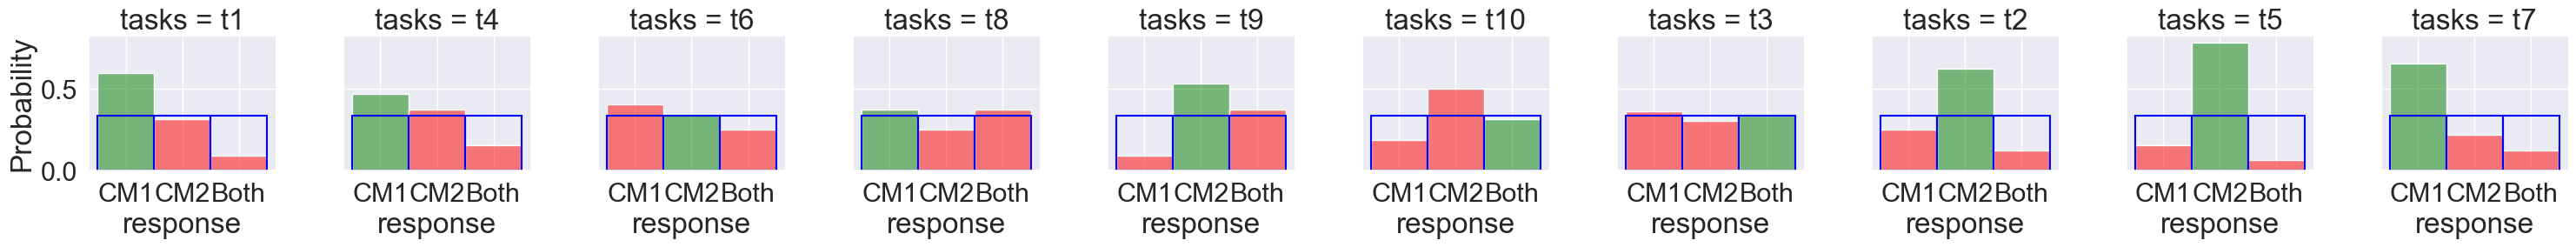

In [32]:
sns.set(font_scale=2)
palette=["red", "green"]
agent_color = "blue"
g = sns.FacetGrid(df, col='tasks', hue = "correct_answ")

for ax in g.fig.axes:
    task = ax.title.get_text()[8:]
    sns.histplot(df[df['tasks']==task],
        x="response",hue = "correct_answ",
        binwidth=0, stat = "probability", discrete = True, ax = ax, legend = False,palette=palette) 
    sns.histplot(
        x=['CM1', 'CM2', 'Both'], color = agent_color,
        binwidth=0, stat = "probability", discrete = True, ax = ax, legend = False, fill = False) 

# fig = g.fig
# fig.savefig("T1_responses_count_per_task.png") 

[Text(0.5, 1.0, 'All Responses in T1 tasks')]

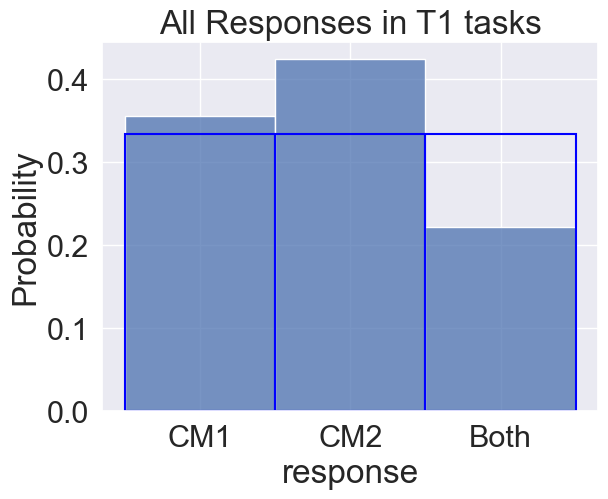

In [33]:
T1_hist = sns.histplot(
    df, x="response",
    binwidth=0, stat = "probability", discrete = True)
sns.histplot(
    x=['CM1', 'CM2', 'Both'],
    binwidth=0, stat = "probability", discrete = True, ax =T1_hist, fill = False , color = agent_color)
T1_hist.set(title='All Responses in T1 tasks')
# fig = T1_hist.get_figure()
# fig.savefig("T1_responses_aggregated.png") 

### Second Agent

In [34]:
t_options = get_t_options(db_file_path)
opts_per_task, corr_per_task = _opts_per_task(t_options, t_ids['T1'])
##
T1_answ_options_count_per_task = {}
T1_answ_options_count_per_task["tasks"] = []
T1_answ_options_count_per_task["response"] = []
T1_answ_options_count_per_task["correct_answ"] = []
for p_id in data:
    for t_id in data[p_id]["t_answers"]:
        if t_id in t_ids['T1']:
            for rep in data[p_id]["t_answers"][t_id]["options"]:
                
                if 'Both' in rep:
                    T1_answ_options_count_per_task["response"].append('CM1')
                    T1_answ_options_count_per_task["response"].append('CM2')
                    ##
                    T1_answ_options_count_per_task["tasks"].append(t_id)
                    T1_answ_options_count_per_task["tasks"].append(t_id)
                    if rep == corr_per_task[t_id][0]:
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                    elif corr_per_task[t_id][0] == "Causal Model 1":
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                        T1_answ_options_count_per_task["correct_answ"].append(0)
                    elif corr_per_task[t_id][0] == "Causal Model 2":
                        T1_answ_options_count_per_task["correct_answ"].append(0)
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                elif rep == 'Causal Model 1':
                    T1_answ_options_count_per_task["tasks"].append(t_id)
                    if rep == corr_per_task[t_id][0] or 'Both' in corr_per_task[t_id][0]:
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                    else:
                        T1_answ_options_count_per_task["correct_answ"].append(0)
                    T1_answ_options_count_per_task["response"].append('CM1')
                elif rep == 'Causal Model 2':
                    T1_answ_options_count_per_task["tasks"].append(t_id)
                    if rep == corr_per_task[t_id][0] or 'Both' in corr_per_task[t_id][0]:
                        T1_answ_options_count_per_task["correct_answ"].append(1)
                    else:
                        T1_answ_options_count_per_task["correct_answ"].append(0)
                    T1_answ_options_count_per_task["response"].append('CM2')
T1_answ_options_count_per_task

df1=pd.DataFrame.from_dict(T1_answ_options_count_per_task)

## random agent
T1_rand_answ_options_count_per_task = {}
T1_rand_answ_options_count_per_task["tasks"] = []
T1_rand_answ_options_count_per_task["response"] = []
T1_rand_answ_options_count_per_task["correct_answ"] = []
for t_id in t_ids['T1']:
    for i in range(1,2000):        
        first_checkbox = random.randint(0, 1)
        second_checkbox = random.randint(0, 1)          
        if(first_checkbox):
            T1_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][0]
            if rep in corr_per_task[t_id]:
                T1_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T1_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'Both' in rep:
                T1_rand_answ_options_count_per_task["response"].append('Both')
            elif rep == 'Causal Model 1':
                T1_rand_answ_options_count_per_task["response"].append('CM1')
            elif rep == 'Causal Model 2':
                T1_rand_answ_options_count_per_task["response"].append('CM2')      
        
        if(second_checkbox):
            T1_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][1]
            if rep in corr_per_task[t_id]:
                T1_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T1_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'Both' in rep:
                T1_rand_answ_options_count_per_task["response"].append('Both')
            elif rep == 'Causal Model 1':
                T1_rand_answ_options_count_per_task["response"].append('CM1')
            elif rep == 'Causal Model 2':
                T1_rand_answ_options_count_per_task["response"].append('CM2')      
        
df1_rand =  pd.DataFrame.from_dict(T1_rand_answ_options_count_per_task)   

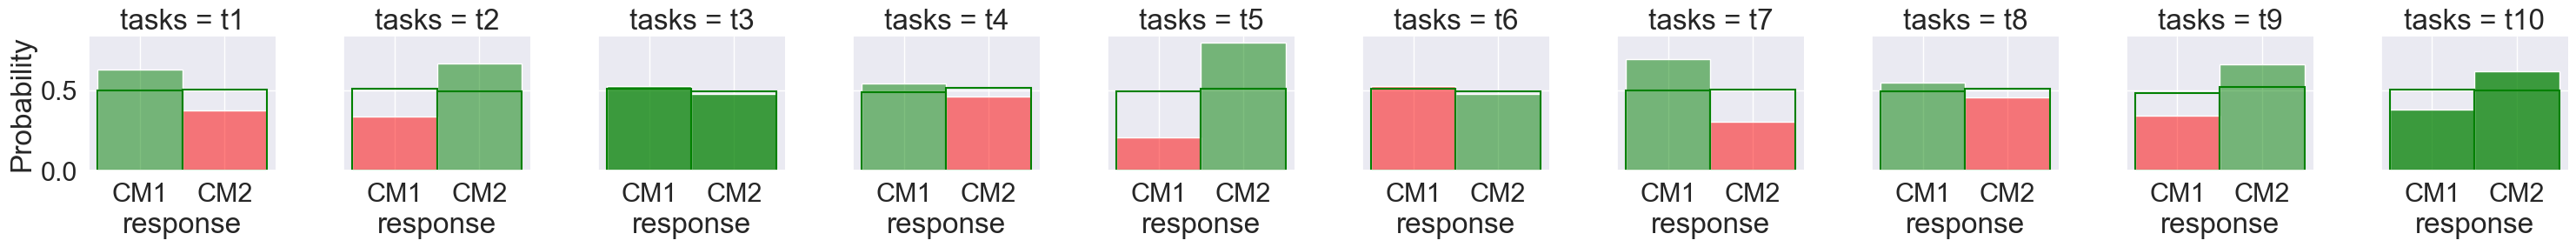

In [37]:
sns.set(font_scale=2)
palette=["red", "green"]
agent_color = "blue"
g = sns.FacetGrid(df1_rand, col='tasks', hue = "correct_answ")

for ax in g.fig.axes:
    task = ax.title.get_text()[8:]
    if task == 't3' or task == 't10':
        sns.histplot(df1[df1['tasks']==task],
                x="response",color = "green",
                binwidth=0, stat = "probability", discrete = True, ax = ax, legend = False,palette=palette)         
    else:
        sns.histplot(df1[df1['tasks']==task],
                x="response",hue = "correct_answ",
                binwidth=0, stat = "probability", discrete = True, ax = ax, legend = False,palette=palette) 
    sns.histplot(df1_rand[df1_rand['tasks']==task],
                x="response", color = c,
                binwidth=0, stat = "probability", discrete = True, ax = ax, legend = False, fill = False) 


# fig = g.fig
# fig.savefig("T1_responses_count_per_task_agent2.png")

## Confidence

In [14]:
t_options = get_t_options(db_file_path)
opts_per_task, corr_per_task = _opts_per_task(t_options, t_ids['T1'])
##
T1_conf_options_count_per_task = {}
T1_conf_options_count_per_task["tasks"] = []
T1_conf_options_count_per_task["response"] = []
for p_id in data:
    for t_id in data[p_id]["t_answers"]:
        rep = data[p_id]['t_answers'][t_id]['confidence']
        T1_conf_options_count_per_task["tasks"].append(t_id)
        if '1' in rep:
            T1_conf_options_count_per_task["response"].append('1')
        elif '2' in rep:
            T1_conf_options_count_per_task["response"].append('2')
        elif '3' in rep:
            T1_conf_options_count_per_task["response"].append('3')
        elif '4' in rep:
            T1_conf_options_count_per_task["response"].append('4')
        elif '5' in rep:
            T1_conf_options_count_per_task["response"].append('5')
T1_conf_options_count_per_task

df_conf=pd.DataFrame.from_dict(T1_conf_options_count_per_task)

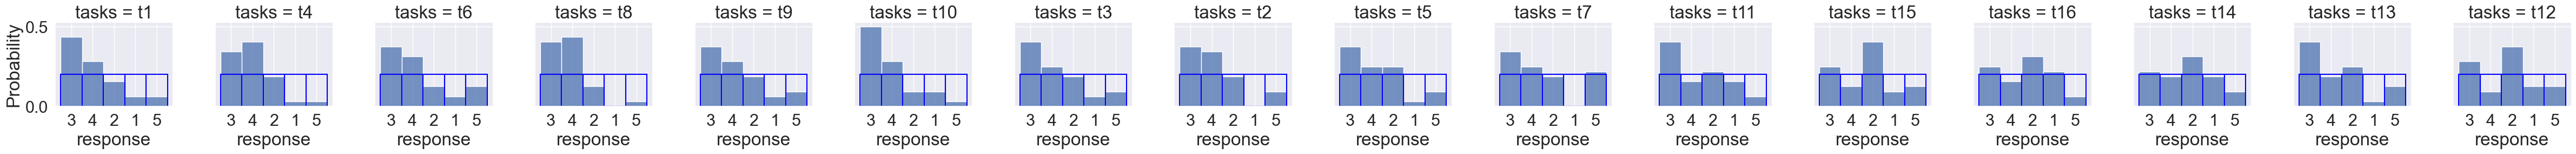

In [15]:
sns.set(font_scale=2)
palette=["red", "green"]
agent_color = "blue"
g = sns.FacetGrid(df_conf, col='tasks')

sns.histplot(
    x=df_conf.query("tasks=='t6'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False, fill = False) 

sns.histplot(
    x=df_conf.query("tasks=='t8'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color =agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t5'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t3'")["response"], 
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3], legend = False ,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t1'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4], legend = False ,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t10'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t9'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[6], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[6] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t7'")["response"], 
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[7], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[7] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t4'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[8], legend = False ,palette=palette) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[8] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t2'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[9], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[9] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t16'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[10], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[10] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t13'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[11], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[11] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t15'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[12], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[12] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t14'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[13], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[13] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t12'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[14], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[14] , legend = False, fill = False)

sns.histplot(
    x=df_conf.query("tasks=='t11'")["response"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[15], legend = False,palette=palette ) 
sns.histplot(
    x=['1', '2', '3', '4', '5'], color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[15] , legend = False, fill = False)

# fig = g.fig
# fig.savefig("confidence_count_per_task.png") 

# T2

In [16]:
t_options = get_t_options(db_file_path)
opts_per_task, corr_per_task = _opts_per_task(t_options, t_ids['T2'])
##
T2_answ_options_count_per_task = {}
T2_answ_options_count_per_task["tasks"] = []
T2_answ_options_count_per_task["response"] = []
T2_answ_options_count_per_task["correct_answ"] = []
for p_id in data:
    for t_id in data[p_id]["t_answers"]:
        if t_id in t_ids['T2']:
            for rep in data[p_id]["t_answers"][t_id]["options"]:
                T2_answ_options_count_per_task["tasks"].append(t_id)
                if rep in corr_per_task[t_id]:
                    T2_answ_options_count_per_task["correct_answ"].append(1)
                else:
                    T2_answ_options_count_per_task["correct_answ"].append(0)
                # T2_answ_options_count_per_task["response"].append(rep)
                if 'None' in rep:
                    T2_answ_options_count_per_task["response"].append('N')
                elif rep == 'Atomic intervention on insomnia':
                    T2_answ_options_count_per_task["response"].append('a_i')
                elif rep == 'Atomic intervention on anxiety':
                    T2_answ_options_count_per_task["response"].append('a_a')
                elif rep == 'Atomic intervention on tiredness':
                    T2_answ_options_count_per_task["response"].append('a_t')
                elif rep == 'Shift intervention on insomnia':
                    T2_answ_options_count_per_task["response"].append('s_i')
                elif rep == 'Shift intervention on anxiety':
                    T2_answ_options_count_per_task["response"].append('s_a')
                elif rep == 'Shift intervention on tiredness':
                    T2_answ_options_count_per_task["response"].append('s_t')
                elif rep == 'Variance intervention on insomnia':
                    T2_answ_options_count_per_task["response"].append('v_i')
                elif rep == 'Variance intervention on anxiety':
                    T2_answ_options_count_per_task["response"].append('v_a')
                elif rep == 'Variance intervention on tiredness':
                    T2_answ_options_count_per_task["response"].append('v_t')
T2_answ_options_count_per_task

df2=pd.DataFrame.from_dict(T2_answ_options_count_per_task)

In [17]:
## random agent

T2_rand_answ_options_count_per_task = {}
T2_rand_answ_options_count_per_task["tasks"] = []
T2_rand_answ_options_count_per_task["response"] = []
T2_rand_answ_options_count_per_task["correct_answ"] = []
for t_id in t_ids['T2']:
    for i in range(1,2000):        
        first_checkbox = random.randint(0, 1)
        second_checkbox = random.randint(0, 1)
        third_checkbox = random.randint(0, 1)
        # fourth_checkbox = random.randint(0, 1)
        # if fourth_checkbox:
        #     first_checkbox = 0
        #     second_checkbox = 0
        #     third_checkbox = 0            
        if(first_checkbox):
            T2_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][0]
            if rep in corr_per_task[t_id]:
                T2_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T2_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'None' in rep:
                T2_rand_answ_options_count_per_task["response"].append('N')
            elif rep == 'Atomic intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('a_i')
            elif rep == 'Atomic intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('a_a')
            elif rep == 'Atomic intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('a_t')
            elif rep == 'Shift intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('s_i')
            elif rep == 'Shift intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('s_a')
            elif rep == 'Shift intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('s_t')
            elif rep == 'Variance intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('v_i')
            elif rep == 'Variance intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('v_a')
            elif rep == 'Variance intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('v_t')            
        
        if(second_checkbox):
            T2_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][1]
            if rep in corr_per_task[t_id]:
                T2_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T2_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'None' in rep:
                T2_rand_answ_options_count_per_task["response"].append('N')
            elif rep == 'Atomic intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('a_i')
            elif rep == 'Atomic intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('a_a')
            elif rep == 'Atomic intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('a_t')
            elif rep == 'Shift intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('s_i')
            elif rep == 'Shift intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('s_a')
            elif rep == 'Shift intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('s_t')
            elif rep == 'Variance intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('v_i')
            elif rep == 'Variance intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('v_a')
            elif rep == 'Variance intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('v_t')
        
        if(third_checkbox):
            T2_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][2]
            if rep in corr_per_task[t_id]:
                T2_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T2_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'None' in rep:
                T2_rand_answ_options_count_per_task["response"].append('N')
            elif rep == 'Atomic intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('a_i')
            elif rep == 'Atomic intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('a_a')
            elif rep == 'Atomic intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('a_t')
            elif rep == 'Shift intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('s_i')
            elif rep == 'Shift intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('s_a')
            elif rep == 'Shift intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('s_t')
            elif rep == 'Variance intervention on insomnia':
                T2_rand_answ_options_count_per_task["response"].append('v_i')
            elif rep == 'Variance intervention on anxiety':
                T2_rand_answ_options_count_per_task["response"].append('v_a')
            elif rep == 'Variance intervention on tiredness':
                T2_rand_answ_options_count_per_task["response"].append('v_t')
        if (first_checkbox == 0 and second_checkbox == 0 and third_checkbox == 0):
        # if (fourth_checkbox):
            T2_rand_answ_options_count_per_task["tasks"].append(t_id)
            rep = opts_per_task[t_id][3]
            if rep in corr_per_task[t_id]:
                T2_rand_answ_options_count_per_task["correct_answ"].append(1)
            else:
                T2_rand_answ_options_count_per_task["correct_answ"].append(0)
            if 'None' in rep:
                T2_rand_answ_options_count_per_task["response"].append('N')
df2_rand =  pd.DataFrame.from_dict(T2_rand_answ_options_count_per_task)     


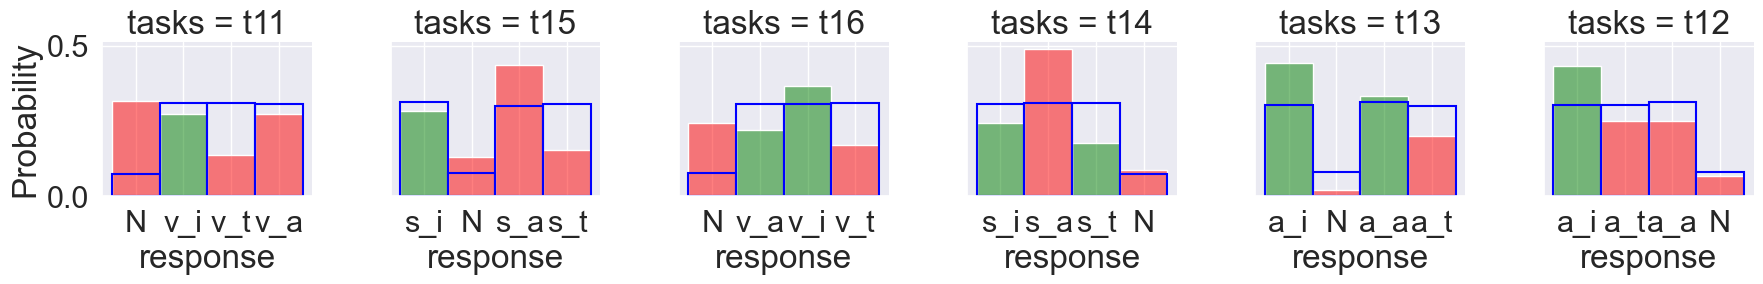

In [18]:
sns.set(font_scale=2)
palette=["red", "green"]
agent_color = "blue"
g = sns.FacetGrid(df2, col='tasks', hue = "correct_answ",sharex=False)

sns.histplot(
    x=df2.query("tasks=='t16'")["response"],hue = df2.query("tasks=='t16'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t16'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t16'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t16'")["response"].unique())), fill = False) 

sns.histplot(
    x=df2.query("tasks=='t13'")["response"],hue = df2.query("tasks=='t13'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t13'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t13'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t13'")["response"].unique())), fill = False) 

sns.histplot(
    x=df2.query("tasks=='t15'")["response"],hue = df2.query("tasks=='t15'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t15'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t15'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t15'")["response"].unique())), fill = False) 

sns.histplot(
    x=df2.query("tasks=='t14'")["response"],hue = df2.query("tasks=='t14'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t14'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t14'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t14'")["response"].unique())), fill = False) 

sns.histplot(
    x=df2.query("tasks=='t12'")["response"],hue = df2.query("tasks=='t12'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t12'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t12'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t12'")["response"].unique())), fill = False) 

sns.histplot(
    x=df2.query("tasks=='t11'")["response"],hue = df2.query("tasks=='t11'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5] , legend = False, palette=palette, bins = len(list(df2.query("tasks=='t11'")["response"].unique()))) 
sns.histplot(
    x=df2_rand.query("tasks=='t11'")["response"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5] , legend = False, palette=palette, bins = len(list(df2_rand.query("tasks=='t11'")["response"].unique())), fill = False) 
fig = g.fig
fig.savefig("T2_responses_count_per_task.png") 

### Causal Model

In [19]:
t_options = get_t_options(db_file_path)
opts_per_task, corr_per_task = _opts_per_task(t_options, t_ids['T2'])
##
T2_answ_options_count_per_task = {}
T2_answ_options_count_per_task["tasks"] = []
T2_answ_options_count_per_task["response"] = []
T2_answ_options_count_per_task["correct_answ"] = []
for p_id in data:
    for t_id in data[p_id]["t_answers"]:
        if t_id in t_ids['T2']:
            rep=data[p_id]["t_answers"][t_id]["model_opt"]
            if rep:
                T2_answ_options_count_per_task["tasks"].append(t_id)
                if rep in corr_per_task[t_id]:
                    T2_answ_options_count_per_task["correct_answ"].append(1)
                else:
                    T2_answ_options_count_per_task["correct_answ"].append(0)
                if 'Causal Model 1' in rep:
                    T2_answ_options_count_per_task["response"].append('CM1')
                elif 'Causal Model 2' in rep:
                    T2_answ_options_count_per_task["response"].append('CM2')
                elif 'Causal Model 3' in rep:
                    T2_answ_options_count_per_task["response"].append('CM3')
T2_answ_options_count_per_task

df2_cm=pd.DataFrame.from_dict(T2_answ_options_count_per_task)

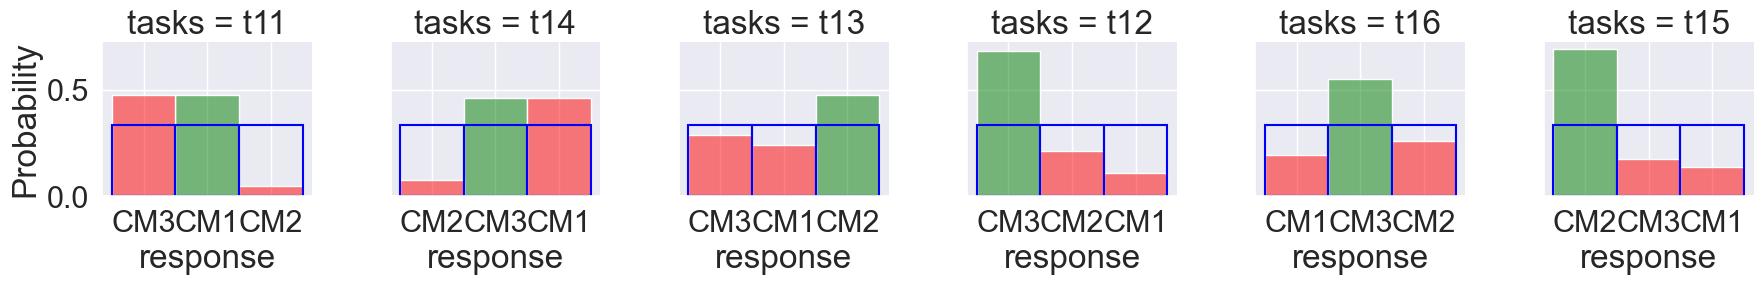

In [20]:
sns.set(font_scale=2)
palette=["red", "green"]
agent_color = "blue"
g = sns.FacetGrid(df2_cm, col='tasks', hue = "correct_answ",sharex=False)

sns.histplot(
    x=df2_cm.query("tasks=='t16'")["response"],hue = df2_cm.query("tasks=='t16'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t16'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[0] , legend = False, palette=palette, bins = 3, fill = False) 

sns.histplot(
    x=df2_cm.query("tasks=='t13'")["response"],hue = df2_cm.query("tasks=='t13'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t13'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[1] , legend = False, palette=palette, bins = 3, fill = False) 

sns.histplot(
    x=df2_cm.query("tasks=='t15'")["response"],hue = df2_cm.query("tasks=='t15'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t15'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[2] , legend = False, palette=palette, bins = 3, fill = False) 

sns.histplot(
    x=df2_cm.query("tasks=='t14'")["response"],hue = df2_cm.query("tasks=='t14'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t14'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[3] , legend = False, palette=palette, bins = 3, fill = False) 

sns.histplot(
    x=df2_cm.query("tasks=='t12'")["response"],hue = df2_cm.query("tasks=='t12'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t12'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[4] , legend = False, palette=palette, bins =3, fill = False) 

sns.histplot(
    x=df2_cm.query("tasks=='t11'")["response"],hue = df2_cm.query("tasks=='t11'")["correct_answ"],
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5] , legend = False, palette=palette, bins = len(list(df2_cm.query("tasks=='t11'")["response"].unique()))) 
sns.histplot(
    x=["CM1","CM2","CM3"],color = agent_color,
    binwidth=0, stat = "probability", discrete = True, ax =g.fig.axes[5] , legend = False, palette=palette, bins = 3, fill = False) 
fig = g.fig
fig.savefig("T2_models_count_per_task.png") 